
# Data loading and preprocessing

In [90]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data from local computer and .npy format

In [78]:
def load_data(path):
    """
    Function to load datasets in format .NPY
    
    Parameter:
    ----------
    path : string
        The absolute path of where data saved in local system
        
    Return:
    ----------
    loaded_data : ndarray
        The data which was loaded
    """
    loaded_data = np.load(path)
    return loaded_data

In [79]:
# define the absolute path of training datatsat
path_x = "Total_Dataset_V0\Abder_Intersect_Simulations_5_spots\All_X.npy"
path_target = "Total_Dataset_V0\Abder_Intersect_Simulations_5_spots\All_Y.npy"
# use load_data function nd above path to loading data
X_data = load_data(path_x)
target_data = load_data(path_target)

In [80]:
print(X_data.shape)
# split dataset to training and testing dataset with 75% total size for training and 25% for testing
train_size = 2250
test_size = 750

(3000, 14, 100, 100, 2)


## Preprocessing data (Normalized and standardized)

The goal of applying Feature Scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most ML algorithms by helping the gradient descent converge more quickly towards the minima.

Two common methods for feature scaling are : 

- Normalization
\
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardaisation\
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.



In [83]:
# Two common methods for feature scaling is : 1-Normalization & 2-Standardaisation

def normalize(data):
    """
    this function used for Max-Min Normalization (Min-Max scaling) by re-scaling
    features with a distribution value between 0 and 1. For every feature,the minimum
    value of that feature gets transformed into 0, and the maximum value 
    gets transformed into 1
    
    Parameter:
    ----------
    data : ndarray
        The numpy array which we want to normalize
        
    Return:
    ----------
    norm_data : ndarray
        The normalized data which transformed into 0 and 1
    """
    max_p = np.max(data[:train_size, :, :, :])
    min_p = np.min(data[:train_size, :, :, :])
    norm_data = (data - min_p)/(max_p - min_p)
    return norm_data

def standardize(data):
    """
    this function used for rescaling faetures to ensure the mean
    and the standard deviation to be 0 and 1, respectively.
    
    Parameter:
    ----------
    data : ndarray
        The numpy array which we want to normalize
        
    Return:
    ----------
    data : ndarray
        The standardized data which the mean
    and the standard deviation to be 0 and 1
    """
    data_mean = np.mean(data[:train_size, :, :, :], axis = 0, keepdims = True)
    data_std = np.std(data[:train_size, :, :, :], axis = 0, keepdims = True)
    std_data = (data - data_mean)/(data_std)
    return std_data

In [84]:
# Split datasets to porosity, permeability and pressurre and ssaturation 
permeability = X_data[:, : , : , :, 1]
porosity = X_data[:, : , : , :, 0]
saturation = target_data[:, :, :, :, 0]
pressure = target_data[:, :, :, :, 1]

## Feature statistics before and after training data normalization

In [87]:
##-------------------Pressure statistics---------------------##
p_mean = np.mean(pressure[:train_size, :, :, :], axis = 0, keepdims = True)
p_std = np.std(pressure[:train_size, :, :, :], axis = 0)
print('max pressure is ', np.max(pressure[:train_size, :, :, :]), ', min pressure is ', np.min(pressure[:train_size, :, :, :]))
#print('mean pressure is ', p_mean, ', std pressure is ', p_std)
##-------------------Saturation statistics---------------------##
sat_mean = np.mean(saturation[:train_size, :, :, :], axis = 0, keepdims = True)
sat_std = np.std(saturation[:train_size, :, :, :], axis = 0)
print('max saturation is ', np.max(saturation[:train_size, :, :, :]), ', min saturation is ', np.min(saturation[:train_size, :, :, :]))
#print('mean saturation is ', sat_mean, ', std saturation is ', sat_std)
##--------------------Permeability statistics--------------------##
K_mean = np.mean(permeability[:train_size, :, :, :], axis = 0, keepdims = True)
K_std = np.std(permeability[:train_size, :, :, :], axis = 0)
print('max permeability is ', np.max(permeability[:train_size, :, :, :]), ', min permeability is ', np.min(permeability[:train_size, :, :, :]))
#print('mean permeability is ', K_mean, ', std permeability is ', K_std)
##--------------------Porosity statistics--------------------##
poro_mean = np.mean(porosity[:train_size, :, :, :], axis = 0, keepdims = True)
poro_std = np.std(porosity[:train_size, :, :, :], axis = 0)
print('max porosity is ', np.max(porosity[:train_size, :, :, :]), ', min porosity is ', np.min(porosity[:train_size, :, :, :]))
#print('mean porosity is ', poro_mean, ', std porosity is ', poro_std)

max pressure is  0.568581759929657 , min pressure is  0.08140351623296738
max saturation is  1.0 , min saturation is  0.0022850215743466947
max permeability is  0.9333820040141154 , min permeability is  0.0
max porosity is  1.0 , min porosity is  0.0


In [88]:
# Normalize data using abov normalize function
porosity = normalize(porosity)
permeability = normalize (permeability)
saturation = normalize(saturation)
pressure = normalize(pressure)
# Statistics of data features after normalisation 
##-------------------Pressure statistics---------------------##
print('max pressure is ', np.max(pressure[:train_size, :, :, :]), ', min pressure is ', np.min(pressure[:train_size, :, :, :]))
##-------------------Saturation statistics---------------------##
print('max saturation is ', np.max(saturation[:train_size, :, :, :]), ', min saturation is ', np.min(saturation[:train_size, :, :, :]))
##--------------------Permeability statistics--------------------##
print('max permeability is ', np.max(permeability[:train_size, :, :, :]), ', min permeability is ', np.min(permeability[:train_size, :, :, :]))
##--------------------Porosity statistics--------------------##
print('max porosity is ', np.max(porosity[:train_size, :, :, :]), ', min porosity is ', np.min(porosity[:train_size, :, :, :]))

In [89]:
# Statistics of data features after normalisation 
##-------------------Pressure statistics---------------------##
print('max pressure is ', np.max(pressure[:train_size, :, :, :]), ', min pressure is ', np.min(pressure[:train_size, :, :, :]))
##-------------------Saturation statistics--------------------##
print('max saturation is ', np.max(saturation[:train_size, :, :, :]), ', min saturation is ', np.min(saturation[:train_size, :, :, :]))
##--------------------Permeability statistics-----------------##
print('max permeability is ', np.max(permeability[:train_size, :, :, :]), ', min permeability is ', np.min(permeability[:train_size, :, :, :]))
##--------------------Porosity statistics---------------------##
print('max porosity is ', np.max(porosity[:train_size, :, :, :]), ', min porosity is ', np.min(porosity[:train_size, :, :, :]))

max pressure is  1.0 , min pressure is  0.0
max saturation is  1.0 , min saturation is  0.0
max permeability is  1.0 , min permeability is  0.0
max porosity is  1.0 , min porosity is  0.0


## Plotting the porosity and permeability map

In [91]:
# check if all the predictions are correct
plt.set_cmap('jet')

ind_case = [0, 1, 3]
num_case = len(ind_case)

<Figure size 432x288 with 0 Axes>

NameError: name 'test_x' is not defined

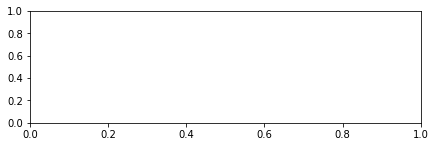

In [92]:
for k in ind_case:
    for i_tstep in range(1):
        plt.figure(figsize=(7,7))
        plt.subplot(3, 1, 1)
        plt.imshow(pressure[k, ::-1, :, 0])
        cbar = plt.colorbar(fraction=0.046)
        cbar.ax.tick_params(labelsize=16)
        plt.tight_layout()
        plt.subplot(3, 1, 2)
        plt.imshow(test_x[k, ::-1, :, 0].reshape((80,80)), vmin=-0.09, vmax=1.07)
        #plt.set_clim([-0.09, 1.07])
        cbar = plt.colorbar(fraction=0.046)
        cbar.ax.tick_params(labelsize=16)
        plt.tight_layout()
        
        plt.subplot(3, 1, 3)
        plt.imshow(test_x[k, ::-1, :, 0].reshape((80,80)) - test_x[k, ::-1, :, i_tstep])
        cbar = plt.colorbar(fraction=0.046)
        cbar.ax.tick_params(labelsize=16)
        #plt.clim([-0.2, 0.2])
        plt.tight_layout()
        #plt.savefig('ind_case_%d_logk'%(k),bbox_inches='tight')
plt.show()